In [19]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import googletrans
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

import random
from nltk.corpus import movie_reviews

import pickle 
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVCfrom nltk.classify import ClassifierI
from statistics import mode

In [2]:
df=pd.read_csv('data_ryan.csv')

In [3]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views
0,Easy DIY Science Experiment for Kids Rainbow S...,Ryan's World,Easy DIY Science Experiment for Kids Rainbow S...,2021-01-24T13:00:02Z,"[""Ryan's World"", 'Ryan ToysReview', 'science e...",1503,399,200970
1,Ryan play with Giant Soccer Ball and Learn abo...,Ryan's World,Ryan play with Giant Soccer Ball and Learn abo...,2021-01-23T13:00:32Z,"[""Ryan's World"", 'force', 'force and motion', ...",2434,626,331667
2,Ryan hides the Golden Egg from King Collectors...,Ryan's World,Ryan hides the Golden Egg from King Collectors...,2021-01-22T13:00:22Z,"[""Ryan's World"", 'Pretend play', 'Combo Panda'...",2469,605,332385
3,Dancing Corn Easy DIY Science Experiments for ...,Ryan's World,Dancing Corn Easy DIY Science Experiments for ...,2021-01-20T13:00:13Z,"[""Ryan's World"", 'Ryan ToysReview', 'dancing c...",7228,2360,1587332
4,Ryan does DIY Science Experiments with Emma an...,Ryan's World,Ryan does DIY Science Experiments with Emma an...,2021-01-18T13:00:29Z,"[""Ryan's World"", 'Ryan ToysReview', 'DIY scien...",16552,6395,4411698


In [4]:
# tags wordcloud
tag_words = '' 
stopwords = set(STOPWORDS)

In [5]:
# iterate through the csv file 
for val in df.tags: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    tag_words += " ".join(tokens)+" "

In [6]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tag_words) 

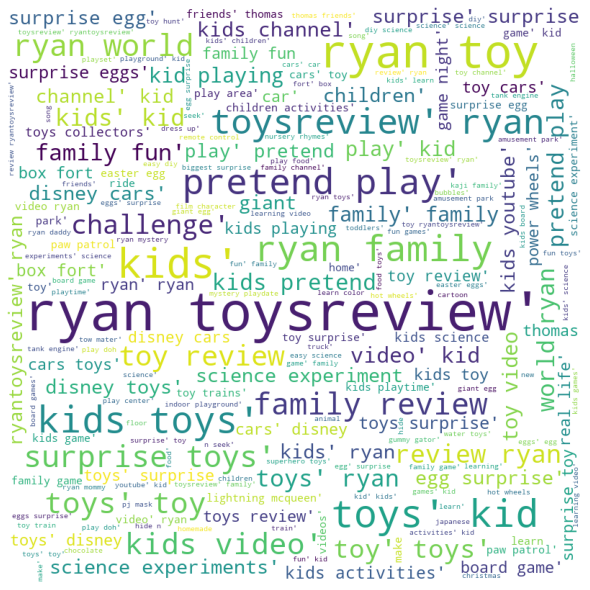

In [7]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [8]:
# title wordcloud
title_words = ''

In [9]:
# iterate through the csv file 
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    title_words += " ".join(tokens)+" "

In [10]:
wordcloud_title = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(title_words) 

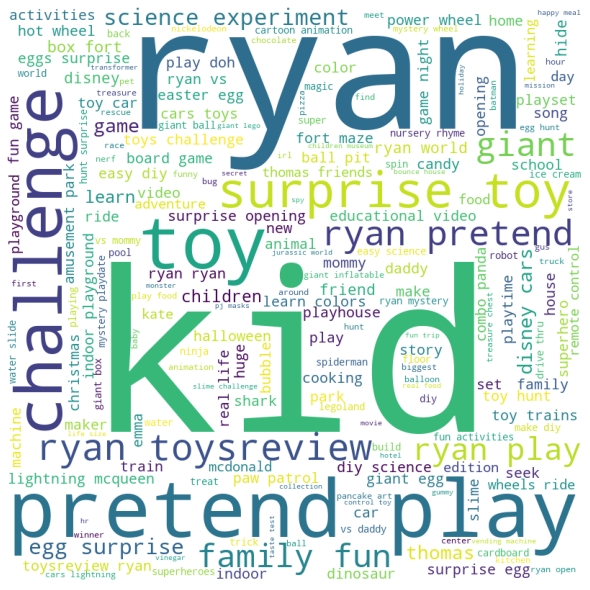

In [11]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_title) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [15]:
#word_data = df.title
#nltk_tokens = nltk.word_tokenize(word_data)  	

print(list(nltk.bigrams(df.tags))[:3])

[('["Ryan\'s World", \'Ryan ToysReview\', \'science experiments\', \'kids science experiments\', \'science experiments for kids\', \'easy DIY science experiments\', \'easy DIY science experiments for kids\', \'snowstorm in a jar\', \'rainbow science experiments\', \'oil and water experiments\', \'kids science video\']', '["Ryan\'s World", \'force\', \'force and motion\', \'learn about force\', \'what is a force\', \'push or pull\', \'science video\', \'kids science video\', \'kids learning video\', \'science preschooler\', \'kids video\', \'educational video\', \'educational video for kids\', \'kids educational video\', \'Kindergarten learning video\']'), ('["Ryan\'s World", \'force\', \'force and motion\', \'learn about force\', \'what is a force\', \'push or pull\', \'science video\', \'kids science video\', \'kids learning video\', \'science preschooler\', \'kids video\', \'educational video\', \'educational video for kids\', \'kids educational video\', \'Kindergarten learning video

In [16]:
print(list(nltk.bigrams(df.title))[:3])

[('Easy DIY Science Experiment for Kids Rainbow Snowstorm in a Jar!!!', 'Ryan play with Giant Soccer Ball and Learn about Force and Motion for kids!!'), ('Ryan play with Giant Soccer Ball and Learn about Force and Motion for kids!!', 'Ryan hides the Golden Egg from King Collectors with Combo Panda!!!'), ('Ryan hides the Golden Egg from King Collectors with Combo Panda!!!', 'Dancing Corn Easy DIY Science Experiments for kids to do at home!!')]


In [28]:
tokenized_word=word_tokenize(title_words)
print(tokenized_word[:5])

['easy', 'diy', 'science', 'experiment', 'for']


In [23]:
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brainz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [27]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 2117 samples and 22249 outcomes>


In [29]:
fdist.most_common(2)

[('!', 2509), ('ryan', 1076)]

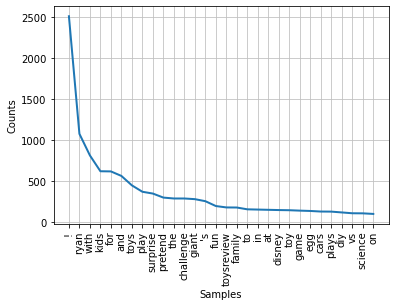

In [30]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()